## Working with GeoPandas to work with Shapefiles  

[GeoPandas](http://geopandas.org/) is: 
- An open source project to work with geospatial data in python. 
- Pandas like datatype used allowing spatial operations on geometric features. 
- Utilizes shapely for geometric operations.
- Utilizes fiona for file access. 
- Utilizes matplotlib and descartes for plotting.
- Install: 
    ``` pip install geopandas ```

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Free data from OSM showing NATURAL places in Nepal
fp = r"osm/nepal-latest-free_24-06-2019.shp/gis_osm_natural_free_1.shp"

In [2]:
data = gpd.read_file(fp)

In [3]:
data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9118 entries, 0 to 9117
Data columns (total 5 columns):
osm_id      9118 non-null object
code        9118 non-null int64
fclass      9118 non-null object
name        833 non-null object
geometry    9118 non-null object
dtypes: int64(1), object(4)
memory usage: 356.2+ KB


In [4]:
type (data)

geopandas.geodataframe.GeoDataFrame

In [5]:
data.columns.values

array([u'osm_id', u'code', u'fclass', u'name', 'geometry'], dtype=object)

In [6]:
data.shape # rows and columns

(9118, 5)

In [7]:
len(data) # how many rows

9118

In [8]:
data.head()

,osm_id,code,fclass,name,geometry
0,272013895,4111,peak,Kangchenjunga,POINT (88.1483408 27.7026008)
1,274019561,4111,peak,Kongde Ri,POINT (86.6149573 27.8019697)
2,274028194,4111,peak,Thamserku,POINT (86.785298 27.7898577)
3,274029669,4111,peak,Kusum Kangguru,POINT (86.79186300000001 27.7322274)
4,288179924,4111,peak,à½¤à½²à½¦à¼à½¦à¼à½¦à¾¤à½à¼à½à¼ å¸å¤å¹«...,POINT (85.77828239999999 28.3553668)


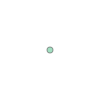

In [9]:
data.loc[0, 'geometry'] # plot the first geometry

In [10]:
data=data.set_index("code")

In [11]:
data.info()# assign an index

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 9118 entries, 4111 to 4121
Data columns (total 4 columns):
osm_id      9118 non-null object
fclass      9118 non-null object
name        833 non-null object
geometry    9118 non-null object
dtypes: object(4)
memory usage: 356.2+ KB


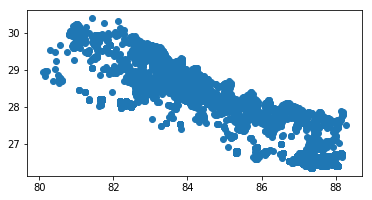

In [12]:
data.plot()

### Changing the transperency using the  alpha attribute (values: 0 to 1)

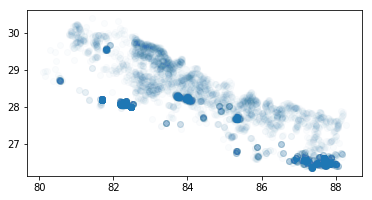

In [13]:
data.plot(alpha=0.02)

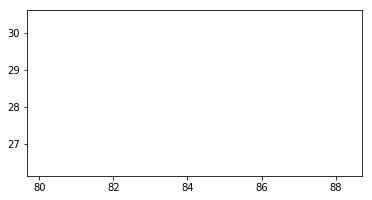

In [14]:
data.plot(alpha=0)

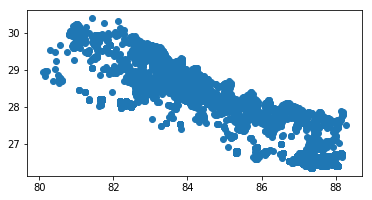

In [15]:
data.plot(alpha=1)

/usr/local/lib/python2.7/dist-packages/geopandas/plotting.py:389: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


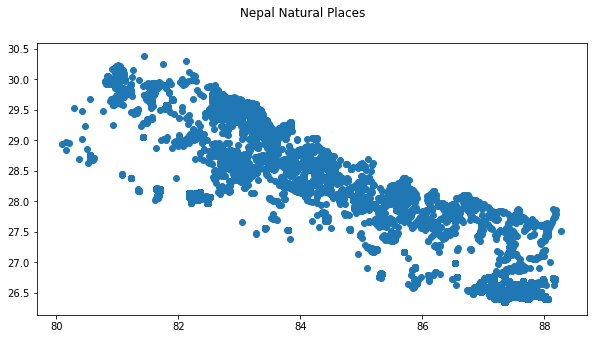

In [16]:
f, ax = plt.subplots(1, figsize=(10, 5)) # specify the size
ax = data.plot(axes=ax)
f.suptitle('Nepal Natural Places')
plt.show()

In [17]:
data.head()

,osm_id,fclass,name,geometry
code,,,,
4111,272013895,peak,Kangchenjunga,POINT (88.1483408 27.7026008)
4111,274019561,peak,Kongde Ri,POINT (86.6149573 27.8019697)
4111,274028194,peak,Thamserku,POINT (86.785298 27.7898577)
4111,274029669,peak,Kusum Kangguru,POINT (86.79186300000001 27.7322274)
4111,288179924,peak,à½¤à½²à½¦à¼à½¦à¼à½¦à¾¤à½à¼à½à¼ å¸å¤å¹«...,POINT (85.77828239999999 28.3553668)


In [18]:
#Make a selection that contains only the first 10 rows
selection = data[0:10]

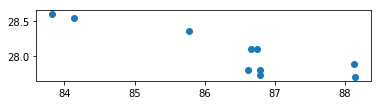

In [19]:
selection.plot()

In [20]:
print ( data.crs) # check the coordinate reference system

{}


No CRS set. So lets set the coordinate system to WGS84.

In [21]:
from fiona.crs import from_epsg

In [22]:
data.crs = from_epsg(4326)

In [23]:
data.crs

{'init': 'epsg:4326', 'no_defs': True}

In [24]:
# save the Shapefile
out_file = r"changed.shp"

# Write the data
data.to_file(out_file)

/usr/local/lib/python2.7/dist-packages/geopandas/io/file.py:108: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


#### Checking & Grouping Data

#### How many 'beach' data are there?

In [25]:
data[data['fclass']=='beach']

,osm_id,fclass,name,geometry
code,,,,
4141,4792111543,beach,Reliance Trekking Pvt Ltd,POINT (85.3116392 27.7181174)
4141,5207959359,beach,None,POINT (86.95649539999999 26.6733186)


In [26]:
data[data['fclass']=='glacier']

,osm_id,fclass,name,geometry
code,,,,
4103,3495374991,glacier,Glacier,POINT (85.86203399999999 28.104334)


#### How many 'beach' have 'name'?

In [27]:
fclass_sums = data.groupby('fclass')['name'].count()
fclass_sums

fclass
beach              1
cave_entrance     14
cliff              8
glacier            1
peak             297
spring            29
tree             483
Name: name, dtype: int64

### References:
- https://kodu.ut.ee/~kmoch/geopython2018/lessons/L2/geopandas-basics.html
- http://www.acgeospatial.co.uk/geopandas-shapefiles-jupyter/
- http://oksovi.geog.okstate.edu/_downloads/91156eb3f0f4b16f07e08bf65dc10ca6/Part%203-%20Geopandas.html
